# Car Price Determination Capstone

### Problem and Question:
Can we determine the market value of a car, based on its car features? Which features have the most weight in market value determination?

### Goal and Approach:
My approach aims to accomplish two things: 

(1.) Identify the top 3 to 5 car features that have the greatest influence on car market value. These features can be used by dealerships and manufacturers in purchasing and/or building the most valuable and popular selling cars. 

(2.) Build a machine learning (ML) predictive model to make accurate, reproducible predictions of price, given car features. This model and its information can be used by dealers, manufacturers, and buyers to maximize profit or savings.

I will complete steps in the data science method including data cleaning and wrangling, EDA, feature analysis, feature manipulation, train/test splitting, scaling, ML, and prediction and evaluation. I plan to test and compare the following 3 ML algorithms:
- Linear Regression
- Random Forest Regression
- XGBoost Regression 

### Data:
The car data are in one data set, scraped from Edmunds.com and Twitter. Each row is a different car and each column is a different feature of that car. Some features include make, model, year, engine, and other properties of the car used to predict its price. The data describes cars sold in the USA between 1990 and 2018.

### Target Feature: 
MSRP (car price, as established by the car manifacturer)

## 1. Importing Packages and Data

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import statistics
import numpy as np
import pandas as pd
from collections import defaultdict

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, cross_val_score
# Normalization scaler
from sklearn.preprocessing import MinMaxScaler
# Error checking
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
# Linear Regression Model
from sklearn.linear_model import LinearRegression
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
# XGBoost
import xgboost as xgb 

In [3]:
car_data = pd.read_csv('car_price_data.csv')
car_data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
car_data.shape

(11914, 16)

## 2. Data Cleaning

In [5]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [6]:
car_data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [7]:
# Identifying null value and what percent of each column is made up of null values. 
car_data_null = pd.concat([car_data.isnull().sum(), 100 * car_data.isnull().mean()], axis=1)
car_data_null.columns=["null count","% of column null"]
car_data_null.sort_values(by=["null count","% of column null"])

,null count,% of column null
Make,0,0.000000
Model,0,0.000000
Year,0,0.000000
Transmission Type,0,0.000000
Driven_Wheels,0,0.000000
Vehicle Size,0,0.000000
Vehicle Style,0,0.000000
highway MPG,0,0.000000
city mpg,0,0.000000
Popularity,0,0.000000


As seen above, Market Category has over 31% of its values as null. I will label the null values as "No Category" and check what the most common categories are.

In [8]:
# Labeling nulls as "No Category"
car_data.loc[np.where(car_data['Market Category'].isnull())[0],'Market Category'] = 'No Category'

# 5 most frequent categories
car_data['Market Category'].value_counts().head()

No Category           3742
Crossover             1110
Flex Fuel              872
Luxury                 855
Luxury,Performance     673
Name: Market Category, dtype: int64

For the rest of the null values, they contribute to less than 1% of each other car feature. Thus, I'll just drop the rows with null values. 

In [9]:
# Dropping null value containing rows from dataset. 
car_df = car_data.dropna()
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11812 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11812 non-null  object 
 1   Model              11812 non-null  object 
 2   Year               11812 non-null  int64  
 3   Engine Fuel Type   11812 non-null  object 
 4   Engine HP          11812 non-null  float64
 5   Engine Cylinders   11812 non-null  float64
 6   Transmission Type  11812 non-null  object 
 7   Driven_Wheels      11812 non-null  object 
 8   Number of Doors    11812 non-null  float64
 9   Market Category    11812 non-null  object 
 10  Vehicle Size       11812 non-null  object 
 11  Vehicle Style      11812 non-null  object 
 12  highway MPG        11812 non-null  int64  
 13  city mpg           11812 non-null  int64  
 14  Popularity         11812 non-null  int64  
 15  MSRP               11812 non-null  int64  
dtypes: float64(3), int64(5

The data set is now clean and ready for EDA!

## 3. Exploring and Visualizing the Data

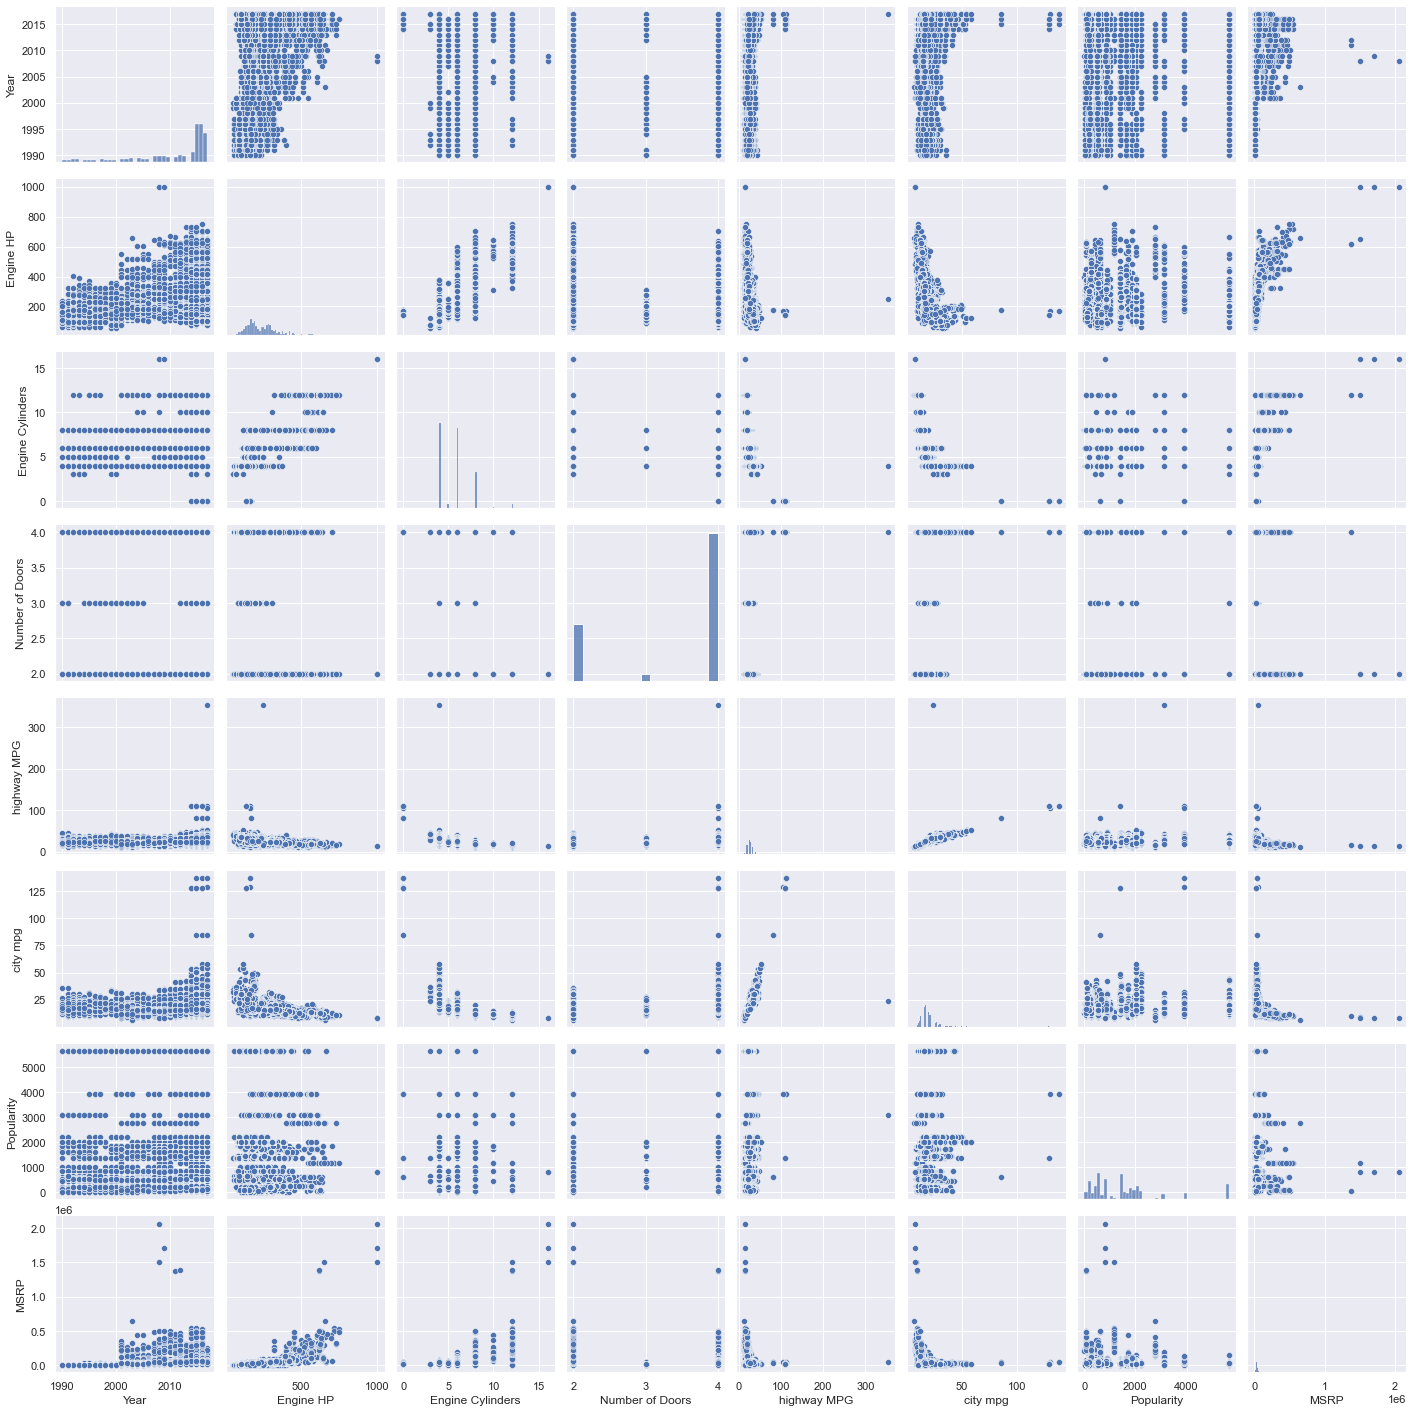

In [59]:
# Plotting key features against one another. 
sns.set(rc={'figure.figsize':(16,14)})
sns.pairplot(car_df)
plt.show()

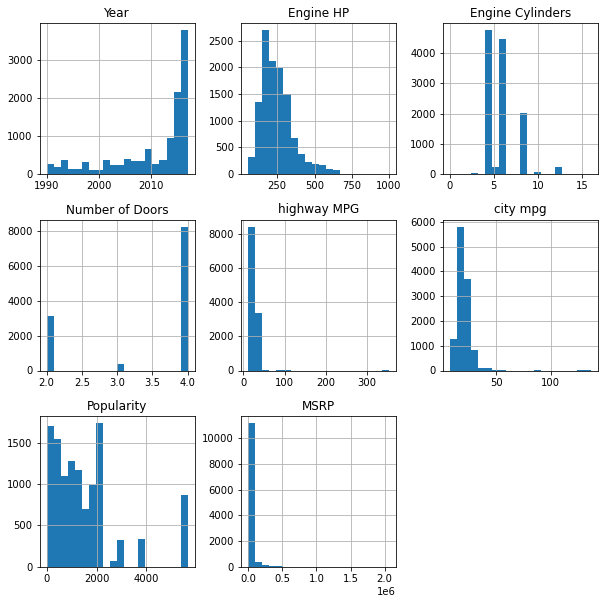

In [11]:
# Plotting histograms to get a better look at all car comparisons at each feature.
car_df.hist(bins=20,figsize=(10,10))
plt.show()

Text(0.5, 1.0, 'Correlations Between Car Features')

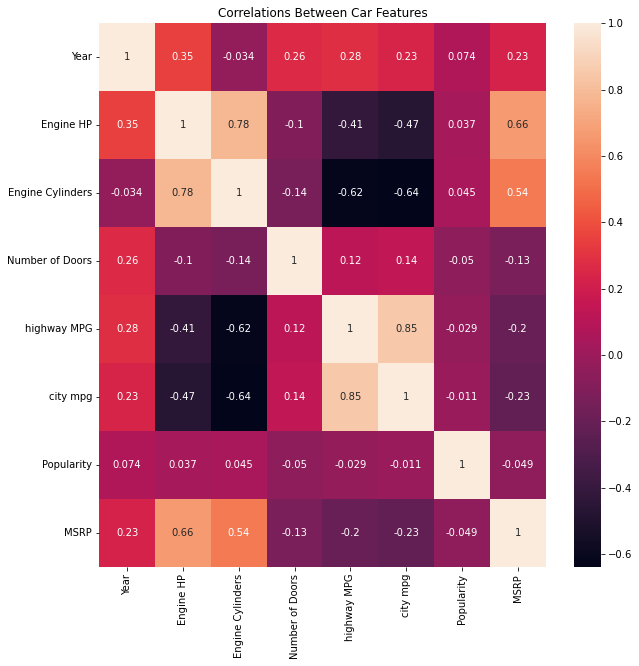

In [12]:
# Plotting the correlation levels between any two features using heatmap and Pearson correlation coefficient.
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(car_df.corr(), annot=True)
plt.title("Correlations Between Car Features")

It looks like Engine Horsepower and Engine Cylinders have the highest correlation with MSRP, our target feature. I'll look more closely into each of those features. 

In [77]:
# Get index of highest number of cylinders
index1 = np.argmax(car_df['MSRP'])
car_df.iloc[index1,:]

Make                                     Bugatti
Model                                Veyron 16.4
Year                                        2008
Engine Fuel Type     premium unleaded (required)
Engine HP                                 1001.0
Engine Cylinders                            16.0
Transmission Type               AUTOMATED_MANUAL
Driven_Wheels                    all wheel drive
Number of Doors                              2.0
Market Category          Exotic,High-Performance
Vehicle Size                             Compact
Vehicle Style                              Coupe
highway MPG                                   14
city mpg                                       8
Popularity                                   820
MSRP                                     2065902
Name: 11362, dtype: object

The Bugatti Veyron 16.4 is the most valuable car in this dataset at 2,065,902 dollars. Let's see if it is also the top car in horspower and engine cylindars. 

In [79]:
# Identify car with the highest horsepower.
index2 = np.argmax(car_df['Engine HP'])
car_df.iloc[index2,:]

Make                                     Bugatti
Model                                Veyron 16.4
Year                                        2008
Engine Fuel Type     premium unleaded (required)
Engine HP                                 1001.0
Engine Cylinders                            16.0
Transmission Type               AUTOMATED_MANUAL
Driven_Wheels                    all wheel drive
Number of Doors                              2.0
Market Category          Exotic,High-Performance
Vehicle Size                             Compact
Vehicle Style                              Coupe
highway MPG                                   14
city mpg                                       8
Popularity                                   820
MSRP                                     2065902
Name: 11362, dtype: object

In [80]:
# Identify car with the most cylindars.
index2 = np.argmax(car_df['Engine Cylinders'])
car_df.iloc[index2,:]

Make                                     Bugatti
Model                                Veyron 16.4
Year                                        2008
Engine Fuel Type     premium unleaded (required)
Engine HP                                 1001.0
Engine Cylinders                            16.0
Transmission Type               AUTOMATED_MANUAL
Driven_Wheels                    all wheel drive
Number of Doors                              2.0
Market Category          Exotic,High-Performance
Vehicle Size                             Compact
Vehicle Style                              Coupe
highway MPG                                   14
city mpg                                       8
Popularity                                   820
MSRP                                     2065902
Name: 11362, dtype: object

You can see that the car with max horsepower and number of cylinders is the same car, and it's also the most expensive car! That makes sense of course because those two features are highly correlated. It is safe to say that horsepower and number of cylindars are two of our key features for MSRP.  

Next, I will take a look at the MSRP over time. 

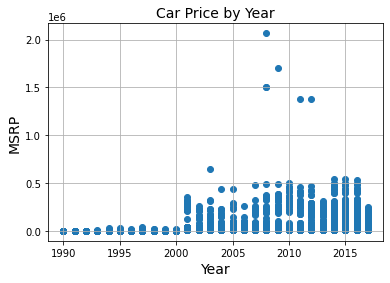

In [23]:
# Plotting a scatter plot of MSRP over time. 
  
plt.scatter(car_df["Year"], car_df["MSRP"])
plt.title('Car Price by Year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('MSRP', fontsize=14)
plt.grid(True)
plt.show()

There are some clear outliers in this plot. I'll try taking the averages per year. I will also plot the median values, since the outliers will presumably skue the averages.

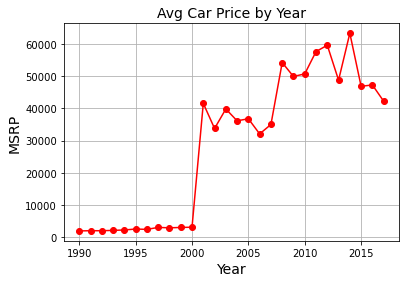

In [49]:
# Plotting a line chart of AVERAGE MSRP over time. 

price_avg_year_list= []
year_list=[1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]
for i in year_list:
    price_avg_year_list.append(car_data[car_data['Year']==i]['MSRP'].mean()) 


plt.plot(year_list, price_avg_year_list, color='red', marker='o')
plt.title('Avg Car Price by Year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('MSRP', fontsize=14)
plt.grid(True)
plt.show()

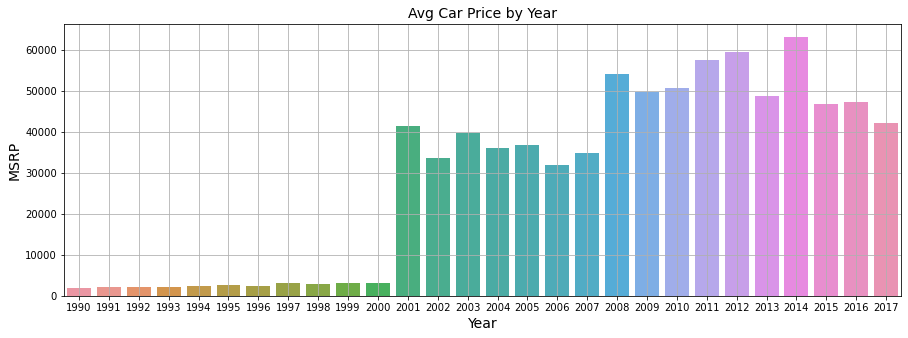

<Figure size 432x288 with 0 Axes>

In [50]:
# Bar chart of AVERAGE MSRP per year. 
fig, axs = plt.subplots(nrows=1, figsize=(15,5))
sns.barplot(x=year_list, y=price_avg_year_list, data=car_data)    
plt.title('Avg Car Price by Year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('MSRP', fontsize=14)
plt.grid(True)
plt.show()
plt.tight_layout()   

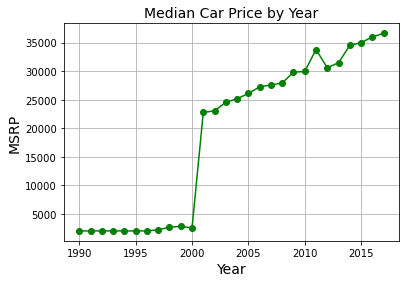

In [51]:
# Plotting a line chart of MEDIAN MSRP over time. 

price_med_year_list= []
year_list=[1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]
for i in year_list:
    price_med_year_list.append(car_data[car_data['Year']==i]['MSRP'].median()) 


plt.plot(year_list, price_med_year_list, color='green', marker='o')
plt.title('Median Car Price by Year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('MSRP', fontsize=14)
plt.grid(True)
plt.show()

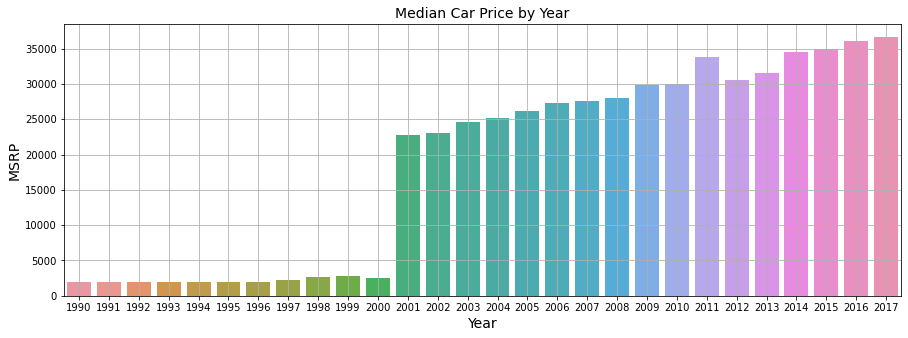

<Figure size 432x288 with 0 Axes>

In [52]:
# Bar chart of MEDIAN MSRP per year. 
fig, axs = plt.subplots(nrows=1, figsize=(15,5))
sns.barplot(x=year_list, y=price_med_year_list, data=car_data)    
plt.title('Median Car Price by Year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('MSRP', fontsize=14)
plt.grid(True)
plt.show()
plt.tight_layout()  

There is a small increase in car price increase from 1990 to 2000, then a large increase from 2000 to 2001. From 2001, we see a steady increase in the median MSRP up through 2017. The average MSRP shows a trending increase as well, though a more up and down trend of MSRP each year. 